# Question 6

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy
from ipynb.fs.defs.funct import showImages, im2col

## 1. Bilateral Filter
 - The Bilateral Filter retains edges while blurring other parts of the image.
 - It comprisess of 2 filters
     - Domain Filter : Which is a gaussian kernel.
     - Range Filter : Which is dependent on the neighbourhood of the image which is exp(-(window - pixel)/(2*(sig_r x sig_r))).

In [2]:
def biLatFilt(img, win_s, sig_r, sig_d):
    ws = np.uint8(win_s/2)
    x = np.linspace(-ws, ws, 2*ws + 1)
    y = np.linspace(-ws, ws, 2*ws + 1)
    xm, ym = np.meshgrid(x, y)
    xm = np.multiply(xm, xm)
    ym = np.multiply(ym, ym)
    zm = xm + ym
    dom_filt = np.exp(zm/(-2*(sig_d**2)))
    r, c = img.shape
    
    x1 = int((win_s - 1)/2)
    y1 = int((win_s - 1)/2)
    x1 = max(x1, 0)
    y1 = max(y1, 0)
    mat = np.zeros((r+win_s-1,c+win_s-1))
    mat[x1:x1+r, y1:y1+c] = img
    
    gt = im2col(np.uint8(mat), (win_s, win_s))
    bt = gt - gt[ws,:]
    bt = -np.multiply(bt, bt)/(2*(sig_r**2))
    ran_filt = np.exp(bt)
    dom_filt = dom_filt.reshape(dom_filt.shape[0]*dom_filt.shape[1],1)
    bil_filt = np.multiply(dom_filt, ran_filt)
    sm = np.sum(bil_filt, axis = 0)
    out = np.sum(np.multiply(bil_filt, gt), axis = 0)
    out = np.divide(out, sm)
    out = out.reshape(img.shape)
    
    return out

In [3]:
def applyBilat(im1, ws, sig_r, sig_d):
    out = copy.deepcopy(im1)
    for i in range(im1.shape[2]):
        out[:,:,i] = biLatFilt(im1[:,:,i], ws, sig_r, sig_d)
    return np.uint8(out)

## Applying Bilateral Filter on sky.png

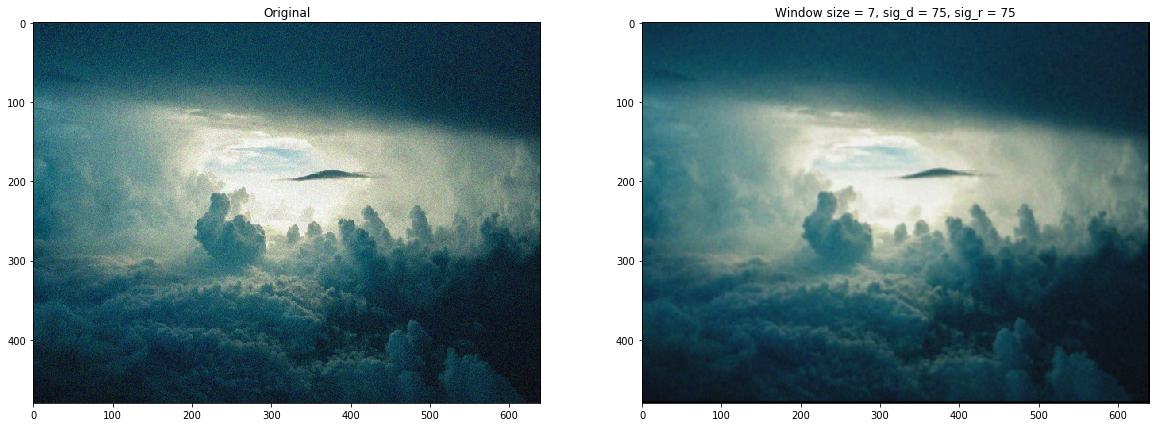

In [4]:
img = cv2.imread('./res/sky.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
ws = 7
sig_d = 75
sig_r = 75
out1 = applyBilat(np.float32(img),ws,sig_r,sig_d)
arr = plt.subplots(1, 2, figsize =(20,20))[1]
arr[0].imshow(img, cmap = 'gray')
arr[0].set_title('Original')
arr[1].imshow(out1, cmap = 'gray')
arr[1].set_title('Window size = '+str(ws)+', sig_d = '+str(sig_d) + ', sig_r = ' + str(sig_r))
plt.show()

## Applying Bilateral Filter on noir.png

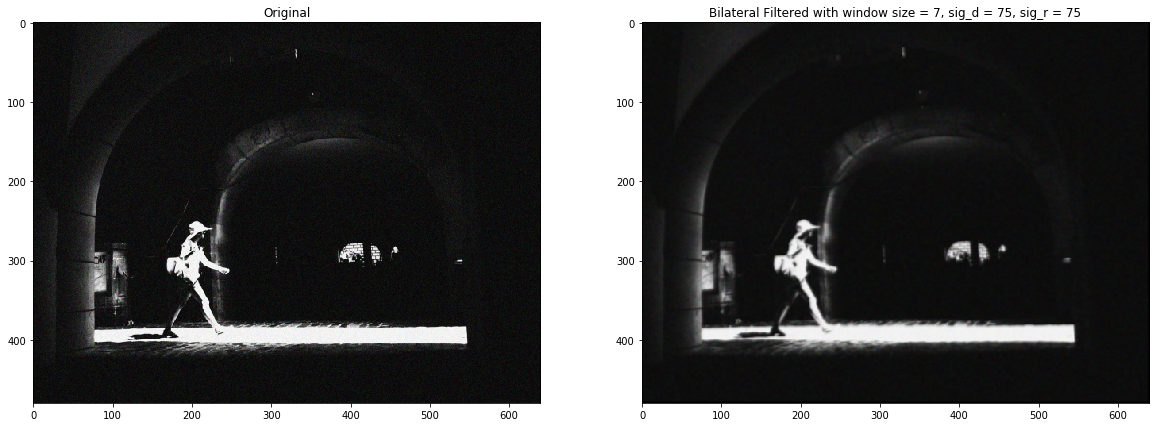

In [5]:
img = cv2.imread('./res/noir.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
ws = 7
sig_d = 75
sig_r = 75
out = applyBilat(np.float32(img),ws,sig_r,sig_d)
arr = plt.subplots(1, 2, figsize =(20,20))[1]
arr[0].imshow(img, cmap = 'gray')
arr[0].set_title('Original')
arr[1].imshow(out, cmap = 'gray')
arr[1].set_title('Bilateral Filtered with window size = '+str(ws)+', sig_d = '+str(sig_d) + ', sig_r = ' + str(sig_r))
plt.show()

## 2. Minimizing L2 Norm :-

Minimum Norm at -> Window size =  5  Sigma_r =  300  Sigma_d =  300
Minimum Norm  =  6361.69387820571


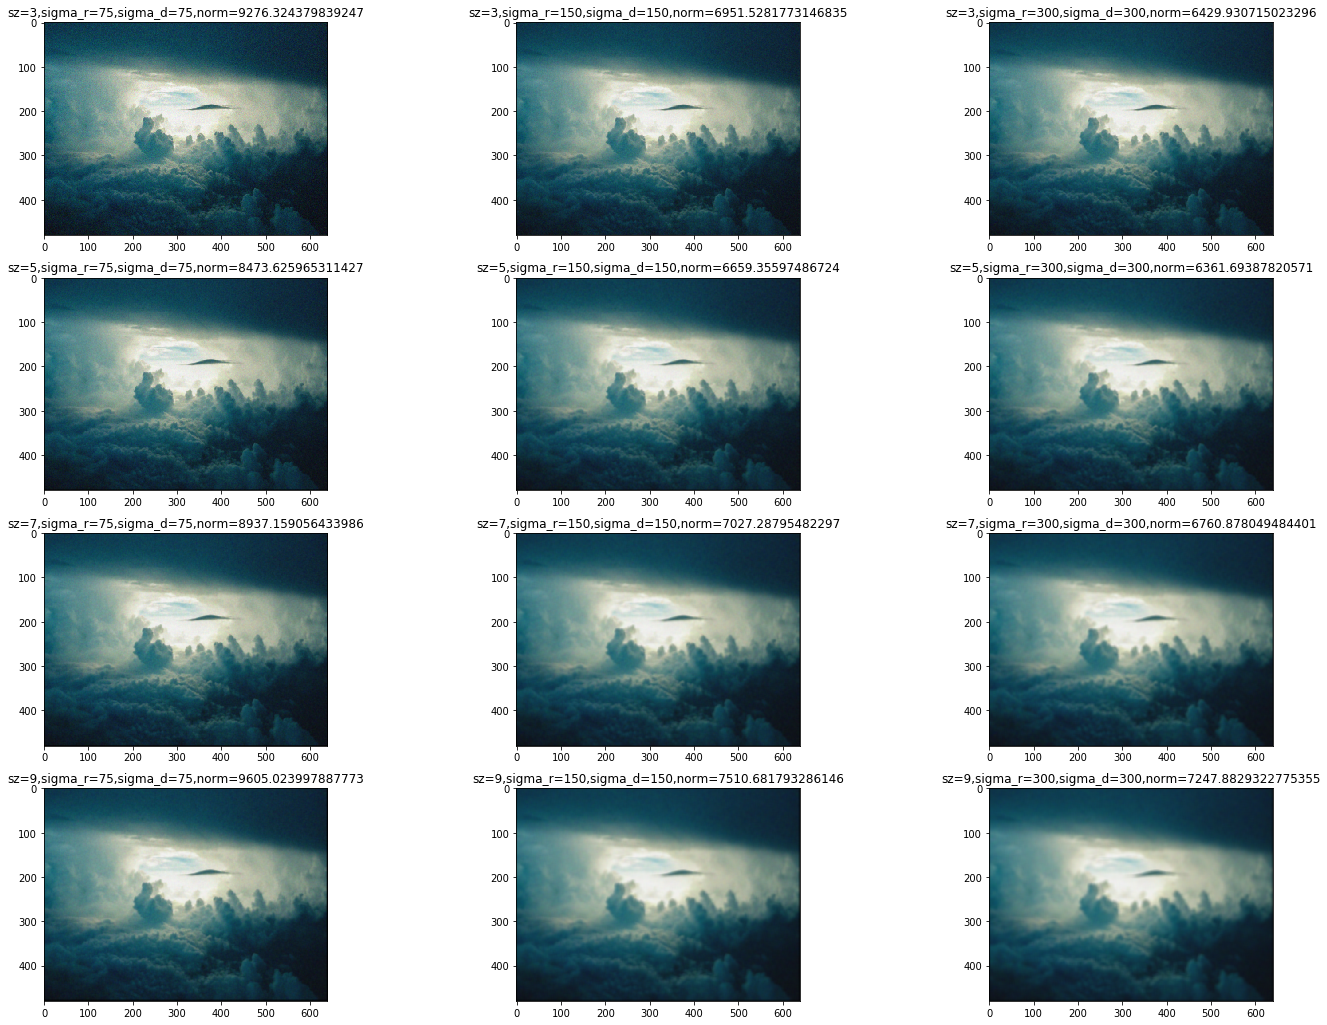

In [8]:
gt = cv2.imread('./res/gt_sky.png')
img = cv2.imread('./res/sky.png')
gt = cv2.cvtColor(gt,cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

sz = [3, 5, 7, 9]
sigma_r = [75, 150, 300]
sigma_d = [75, 150, 300]
arr = plt.subplots(len(sz),len(sigma_r), figsize =(24,18))[1]

minval = cv2.norm(img, gt)
ans_sz = sz[0]
ans_d = sigma_d[0]
ans_r = sigma_r[0]
for i in range(len(sz)):
    for j in range(len(sigma_r)):
        out = applyBilat(np.float32(img),sz[i],sigma_r[j],sigma_d[j])
        val = cv2.norm(out, gt)
        arr[i][j].imshow(out)
        arr[i][j].set_title('sz='+str(sz[i])+',sigma_r='+str(sigma_r[j])+',sigma_d='+str(sigma_d[j])+',norm=' +str(val))
        if val < minval:
            minval = val
            ans_sz = sz[i]
            ans_d = sigma_d[j]
            ans_r = sigma_r[j]

print("Minimum Norm at -> Window size = ", ans_sz," Sigma_r = ", ans_r, " Sigma_d = ", ans_d)
print("Minimum Norm  = ", minval)
plt.show()

## Results :-
- The general trend is that as we increase sigma_r and sigma_d, the L2 norm between the images decreases, this is because we are making the image more smoother.
- As window size is increased from 3 to 5, the L2 norm decreases but therafter it only increases.
- The Minimum norm is obtained at Window size = 5, sigma_r = 300 and sigma)d = 300 which is around 6361 whereas the norm with given image was around 10806

Minimum Norm at -> Window size =  3  Sigma_r =  75  Sigma_d =  75
Minimum Norm  =  11621.156052648119


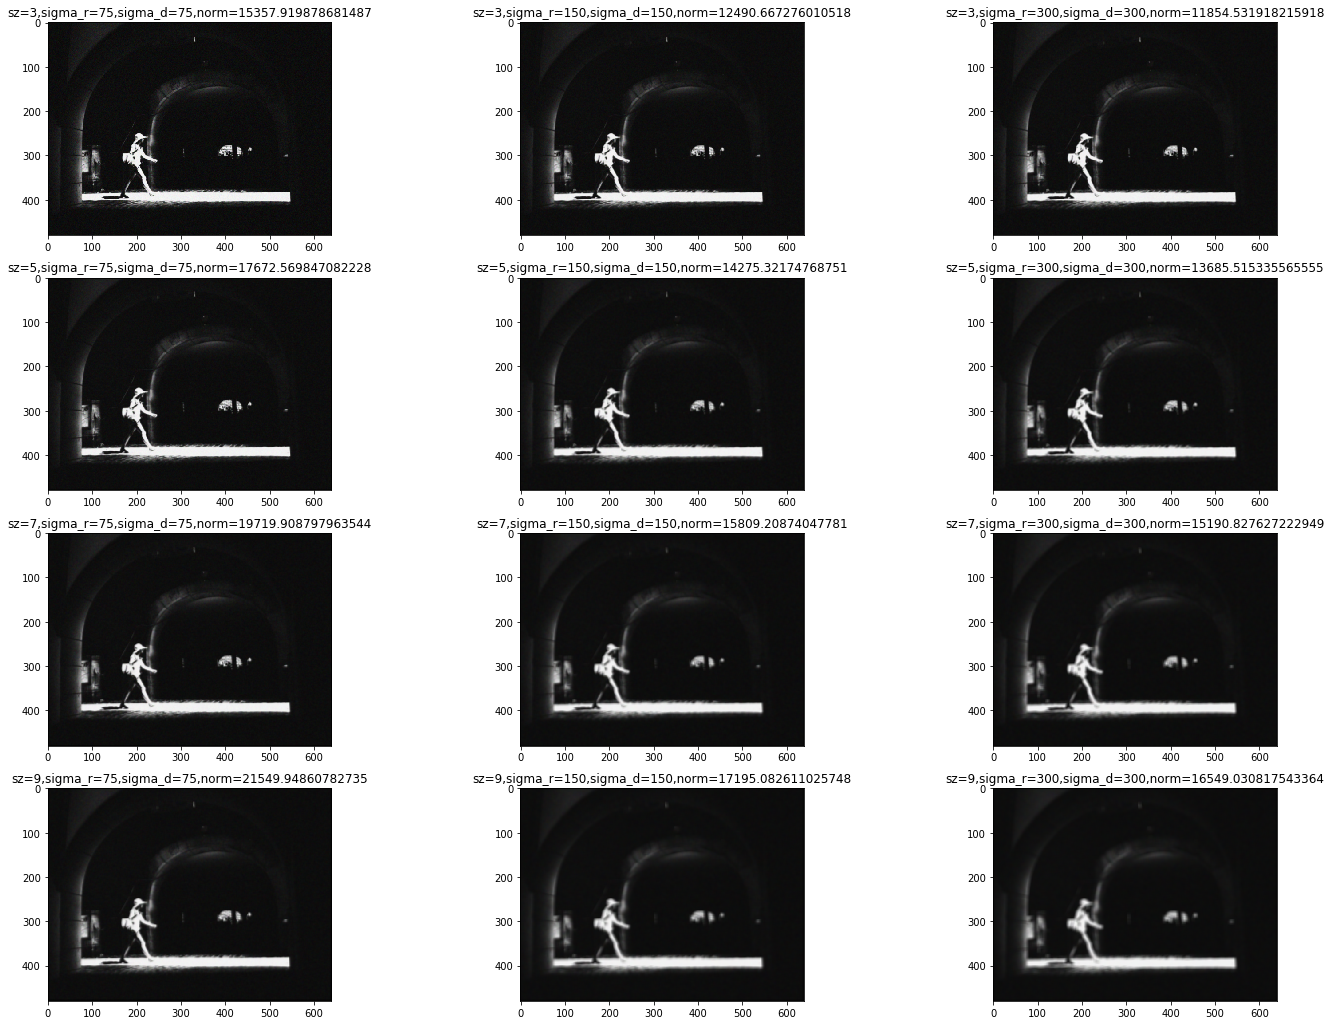

In [11]:
gt = cv2.imread('./res/gt_noir.png')
img = cv2.imread('./res/noir.png')
gt = cv2.cvtColor(gt,cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

sz = [3, 5, 7, 9]
sigma_r = [75, 150, 300]
sigma_d = [75, 150, 300]
arr = plt.subplots(len(sz),len(sigma_r), figsize =(24,18))[1]

minval = cv2.norm(img, gt)
ans_sz = sz[0]
ans_d = sigma_d[0]
ans_r = sigma_r[0]
for i in range(len(sz)):
    for j in range(len(sigma_r)):
        out = applyBilat(np.float32(img),sz[i],sigma_r[j],sigma_d[j])
        val = cv2.norm(out, gt)
        arr[i][j].imshow(out)
        arr[i][j].set_title('sz='+str(sz[i])+',sigma_r='+str(sigma_r[j])+',sigma_d='+str(sigma_d[j])+',norm=' +str(val))
        if val < minval:
            minval = val
            ans_sz = sz[i]
            ans_d = sigma_d[j]
            ans_r = sigma_r[j]

print("Minimum Norm at -> Window size = ", ans_sz," Sigma_r = ", ans_r, " Sigma_d = ", ans_d)
print("Minimum Norm  = ", minval)
plt.show()

## Results :-
- The general trend is that as we increase sigma_r and sigma_d, the L2 norm between the images decreases, this is because we are making the image more smoother.
- As window size is increased the L2 norm only increases.
- The Minimum norm is obtained at Window size = 3, sigma_r = 75 and sigma_d = 75 which is around 11621